In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import make_moons
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [7]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

<Axes: >

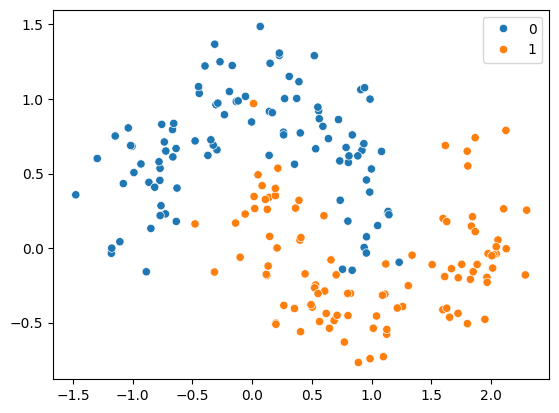

In [8]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [12]:
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 0.6396 - loss: 0.6145 - val_accuracy: 0.8500 - val_loss: 0.3193
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8379 - loss: 0.3737 - val_accuracy: 0.8250 - val_loss: 0.3685
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8706 - loss: 0.2976 - val_accuracy: 0.8250 - val_loss: 0.2859
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8539 - loss: 0.2530 - val_accuracy: 0.8750 - val_loss: 0.2876
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8513 - loss: 0.3105 - val_accuracy: 0.8750 - val_loss: 0.2439
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8865 - loss: 0.2748 - val_accuracy: 0.8750 - val_loss: 0.2338
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8802 - loss: 0.2504 - val_accuracy: 0.8750 - val_loss: 0.2274
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8718 - loss: 0.2613 - val_accuracy: 0.8750 - val_loss: 0.2076
Ep

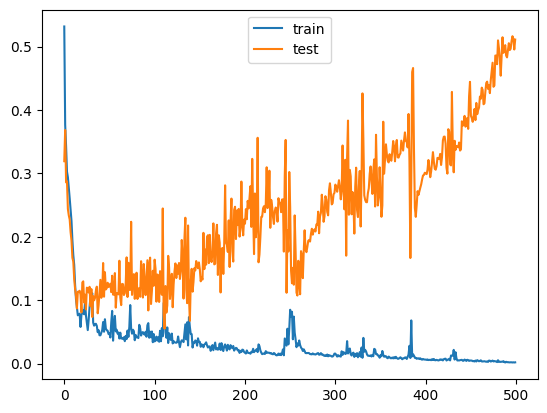

In [13]:
sns.lineplot(history.history['loss'],label='train')
sns.lineplot(history.history['val_loss'],label='test')
plt.legend()

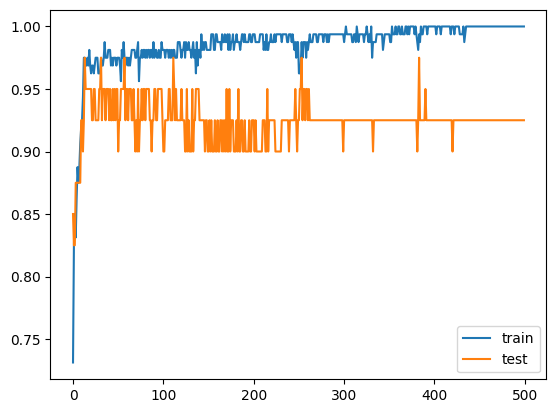

In [14]:
sns.lineplot(history.history['accuracy'],label='train')
sns.lineplot(history.history['val_accuracy'],label='test')
plt.legend()

MODEL IS OVERFITTED AS THE `val_loss` IS QUITE LARGER THAN `loss` AND THIER ACCURACY ALSO DIFFER AS LOT

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


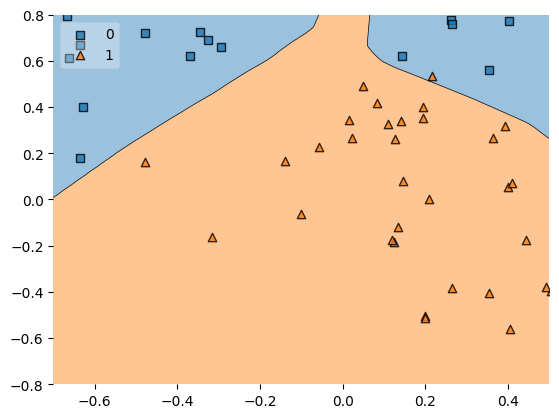

In [15]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

In [16]:
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7664 - loss: 0.5897 - val_accuracy: 0.8500 - val_loss: 0.3214
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8262 - loss: 0.3794 - val_accuracy: 0.8500 - val_loss: 0.3377
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8343 - loss: 0.3555 - val_accuracy: 0.8500 - val_loss: 0.3020
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8355 - loss: 0.3755 - val_accuracy: 0.8250 - val_loss: 0.2906
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8626 - loss: 0.3133 - val_accuracy: 0.8750 - val_loss: 0.2547
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9005 - loss: 0.2916 - val_accuracy: 0.8750 - val_loss: 0.2396
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8968 - loss: 0.2993 - val_accuracy: 0.9000 - val_loss: 0.2562
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8628 - loss: 0.3123 - val_accuracy: 0.8750 - val_loss: 0.2241
Epoc

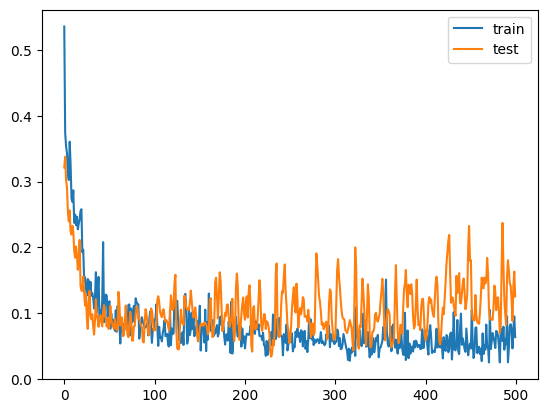

In [17]:
sns.lineplot(history.history['loss'],label='train')
sns.lineplot(history.history['val_loss'],label='test')
plt.legend()

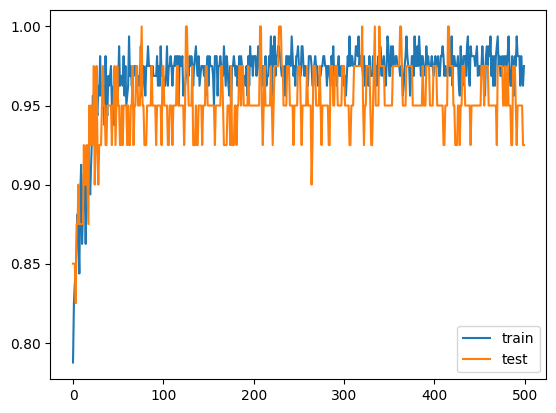

In [18]:
sns.lineplot(history.history['accuracy'],label='train')
sns.lineplot(history.history['val_accuracy'],label='test')
plt.legend()

USING `Dropout` OVERFITTING PROBLEM IS RESOLVED AS `val_loss` AND `loss` ARE NOW QUITE SIMILAR AND LOWER THAN PREV MODEL ,ALSO THE THIER ACCURACY ARE ALSO SIMILAR

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


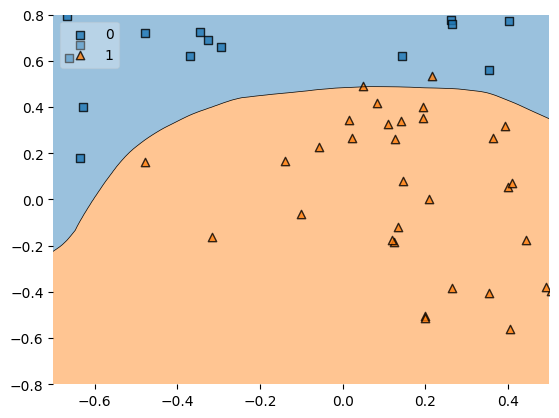

In [19]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()